In [1270]:
# IMPORTS

import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import silhouette_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import Birch
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA

# from imblearn.over_sampling import RandomOverSampler

from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [1271]:
sns.set()

Le modèle de clustering Birch est une méthode de regroupement de données en groupes homogènes.  
Le modèle Birch est adapté pour traiter de grands ensembles de données et utilise deux paramètres principaux,  
le seuil et le nombre de clusters souhaité, pour contrôler la sensibilité de l'algorithme et le nombre de groupes créés.

In [1272]:
# GET DATASETS

df_features = pd.read_csv('csv/Features.csv')
df_streams = pd.read_csv('csv/Streams.csv')

In [1273]:
# CONCAT DATASETS

df_raw = pd.concat([df_features,df_streams],axis=1,join='inner')

In [1274]:
# DROP USELESS COLUMNS

df_final = df_raw.drop(columns=["Release Date","name","id","duration","Artist"]).set_index("Song")
# df_final = df_final.drop(columns=["Release Date","name","id","duration","Artist"])
# df_final = pd.get_dummies(df_final, columns=["Song"])

df_final


,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability,Streams (Billions)
Song,,,,,,,,,,,,
Blinding Lights,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,0.514,3.449
Shape of You,0.652,1,-3.183,0,0.0802,0.58100,0.000000,0.0931,0.931,95.977,0.825,3.398
Dance Monkey,0.588,6,-6.400,0,0.0924,0.69200,0.000104,0.1490,0.513,98.027,0.824,2.770
Someone You Loved,0.405,1,-5.679,1,0.0319,0.75100,0.000000,0.1050,0.446,109.891,0.501,2.680
Rockstar,0.520,5,-6.136,0,0.0712,0.12400,0.000070,0.1310,0.129,159.801,0.585,2.620
...,...,...,...,...,...,...,...,...,...,...,...,...
7 Years,0.473,10,-5.829,1,0.0514,0.28700,0.000000,0.3910,0.340,119.992,0.765,1.529
Yellow,0.661,11,-7.227,1,0.0281,0.00239,0.000121,0.2340,0.285,173.372,0.429,1.527
Sugar,0.816,0,-4.209,1,0.0465,0.12200,0.000000,0.3350,0.557,95.390,0.548,1.524


Text(0, 0.5, 'Silhouette Score')

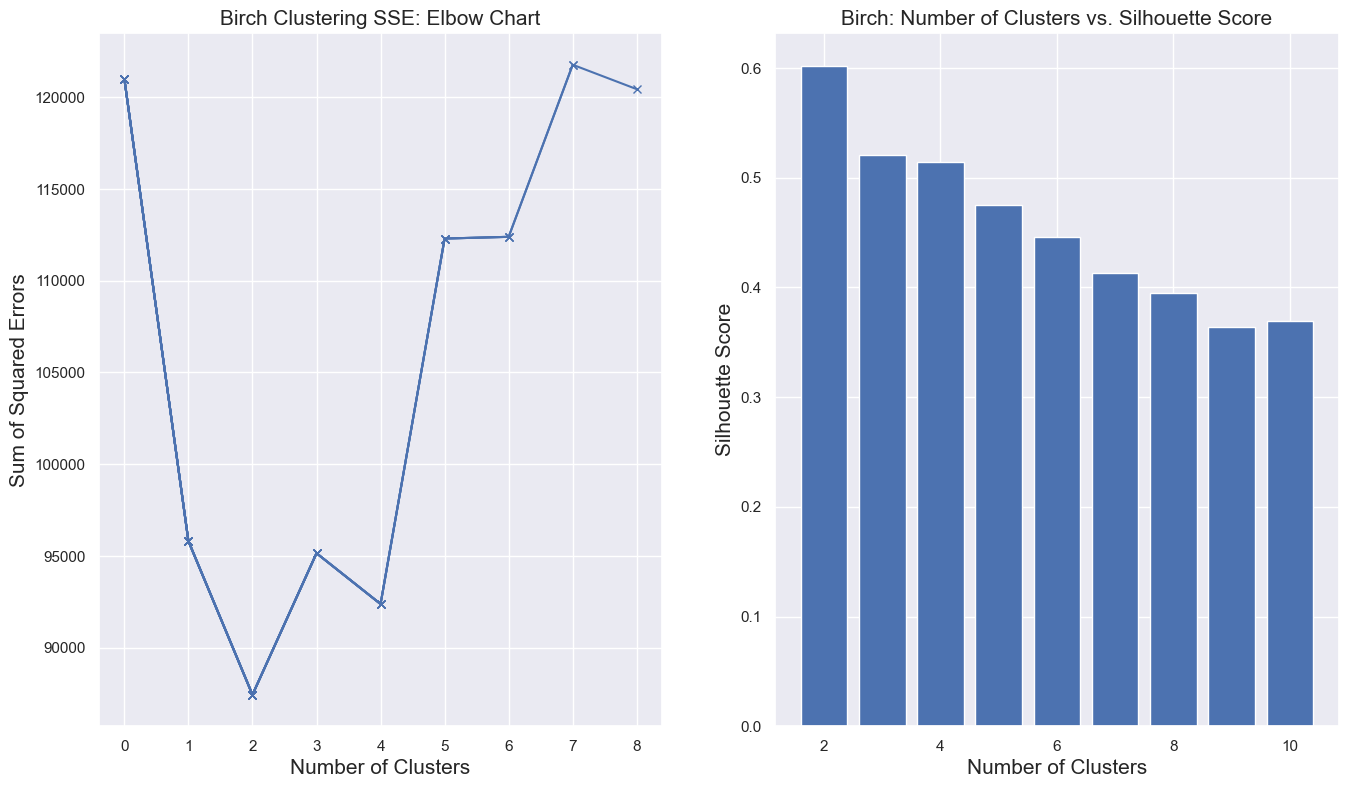

In [1275]:
# ------------------------------------------------------------------------------------
# FIGURE

figure = plt.figure(figsize=(16, 9))
elbow = figure.add_subplot(1,2,1)
birch_sil = figure.add_subplot(1,2,2)

# ------------------------------------------------------------------------------------
# FIGURE SETTINGS FOR ELBOW
    # En général, plus le SSE est faible, meilleure est la qualité de l'ajustement du modèle.

n_clusters = range(2, 11)
inertia = []
for k in n_clusters:
    model = Birch(threshold=0.01, n_clusters=k)
    model.fit(df_final)
    # calcule la somme des erreurs quadratiques pour le modèle actuel et l'ajoute à la liste inertia[].
    inertia.append( np.sum( np.sum((df_final - model.subcluster_centers_[model.predict(df_final)])**2, axis=1) ) )
    elbow.set_ylabel('Sum of Squared Errors', fontsize = 15)
    elbow.set_xlabel('Number of Clusters', fontsize = 15)
    elbow.set_title('Birch Clustering SSE: Elbow Chart', fontsize = 15)
    elbow.plot(inertia, 'bx-')

# ------------------------------------------------------------------------------------
# FIGURE SETTINGS FOR SILHOUETTE SCORE

# calcul du score de silouhete pour chaque valeur de cluster (2 à 10)
silhouette_scores = [
    silhouette_score(
        df_final, Birch(n_clusters=n_cluster).fit_predict(df_final)
    )
    for n_cluster in range(2, 11)
] 

k = [2, 3, 4, 5, 6, 7, 8, 9, 10] 
birch_sil.bar(k, silhouette_scores) 
birch_sil.set_title('Birch: Number of Clusters vs. Silhouette Score', fontsize = 15)
birch_sil.set_xlabel('Number of Clusters', fontsize = 15) 
birch_sil.set_ylabel('Silhouette Score', fontsize = 15) 

# ------------------------------------------------------------------------------------

Le modèle de clustering Birch est une méthode de regroupement de données en groupes homogènes.  
Le modèle Birch est adapté pour traiter de grands ensembles de données et utilise deux paramètres principaux,  
le seuil et le nombre de clusters souhaité, pour contrôler la sensibilité de l'algorithme et le nombre de groupes créés.

In [1276]:

# ------------------------------------------------------------------------------------

# APPLY THE BIRCH MODEL THEN FIT

### PARAMS ###
# threshold : float, default=0.5                                                || The radius of the subcluster
# branching_factor : int, default=50                                            || Maximum number of CF subclusters in each node ( CF => clustering feature )
# n_clusters : int, instance of sklearn.cluster model or None, default=3        || Number of clusters after the final clustering step

# model = Birch(branching_factor=30, n_clusters=5, threshold=2.5)
model = Birch(n_clusters=4)
model.fit(df_final)

Birch(n_clusters=4)

In [1277]:
# CLUSTERS

labels = model.labels_
labels

array([3, 0, 0, 2, 1, 0, 2, 0, 2, 2, 2, 1, 0, 0, 3, 2, 0, 0, 0, 2, 0, 0,
       2, 1, 0, 2, 0, 3, 0, 2, 0, 2, 2, 2, 1, 2, 2, 2, 3, 1, 2, 2, 2, 0,
       0, 1, 0, 2, 1, 2, 3, 1, 2, 0, 1, 0, 0, 2, 1, 0, 2, 3, 2, 1, 3, 2,
       0, 1, 2, 0, 0, 0, 1, 2, 0, 2, 3, 1, 0, 0, 2, 3, 2, 3, 0, 2, 2, 3,
       2, 1, 0, 2, 0, 0, 0, 2, 3, 0, 3, 2], dtype=int64)

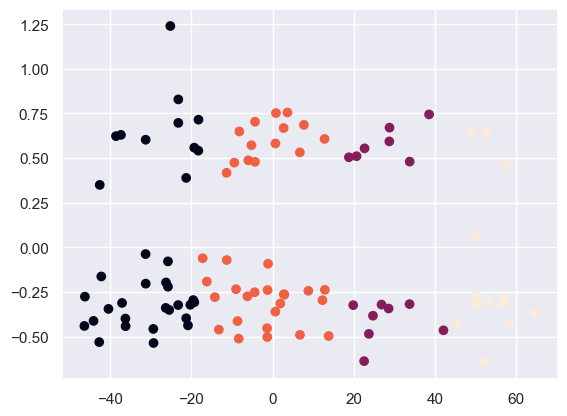

In [1278]:
# APPLY PCA

### PARAMS ###
# n_components : int, float or 'mle', default=None          || Number of components to keep. if n_components is not set all components are kept

### COMPONENTS ###
# In PCA, a "component" refers to a linear combination of the original features or variables that have been transformed 
# into a new set of orthogonal variables, called principal components.

# pca = PCA(n_components=3)
pca = PCA()
pca.fit(df_final)
reduced_df = pca.transform(df_final)

# ------------------------------------------------------------------------------------
# GRAPHE 2D DES CLUSTERS

plt.scatter(reduced_df[:, 0], reduced_df[:, 3], c=labels)
plt.show()

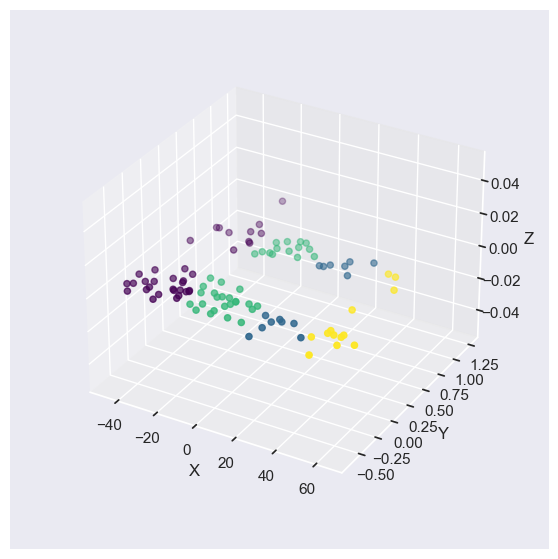

In [1279]:
# GRAPHE 3D DES CLUSTERS

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter3D(reduced_df[:, 0], reduced_df[:, 3], c=labels, cmap='viridis')

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.dist = 12

fig.show()

In [1280]:
# CALCUL DU SCORE DE SILHOUETE POUR LE NOMBRE DE CLUSTERS CHOISI

# silhouette = silhouette_score(df_final, labels)
# print("Silhouette Score:", silhouette)

print("Silhouette Score:", silhouette_score(df_final, labels))

Silhouette Score: 0.5146683631389201


In [1281]:
# ADD THE CLUSTER COLUMN 

df_raw = df_raw.drop(columns=["Release Date","name","id","duration","Artist"])

birch_clusters = pd.concat([df_raw, pd.DataFrame({'cluster':labels})], axis=1)
birch_clusters.head()

,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability,Song,Streams (Billions),cluster
0,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,0.514,Blinding Lights,3.449,3
1,0.652,1,-3.183,0,0.0802,0.58100,0.000000,0.0931,0.931,95.977,0.825,Shape of You,3.398,0
2,0.588,6,-6.400,0,0.0924,0.69200,0.000104,0.1490,0.513,98.027,0.824,Dance Monkey,2.770,0
3,0.405,1,-5.679,1,0.0319,0.75100,0.000000,0.1050,0.446,109.891,0.501,Someone You Loved,2.680,2
4,0.520,5,-6.136,0,0.0712,0.12400,0.000070,0.1310,0.129,159.801,0.585,Rockstar,2.620,1


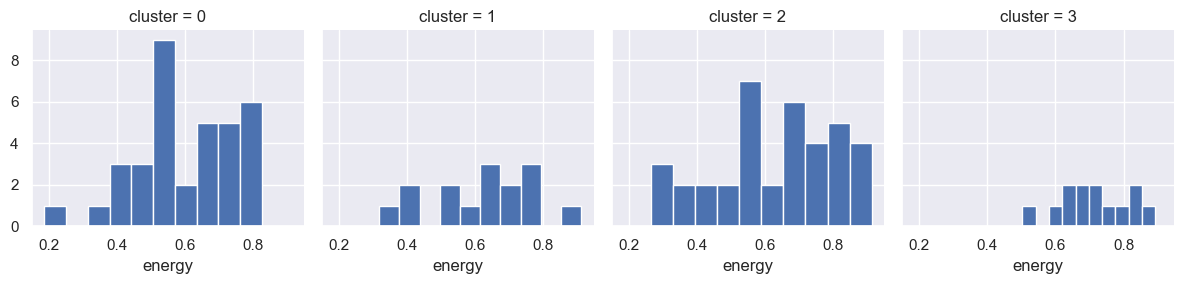

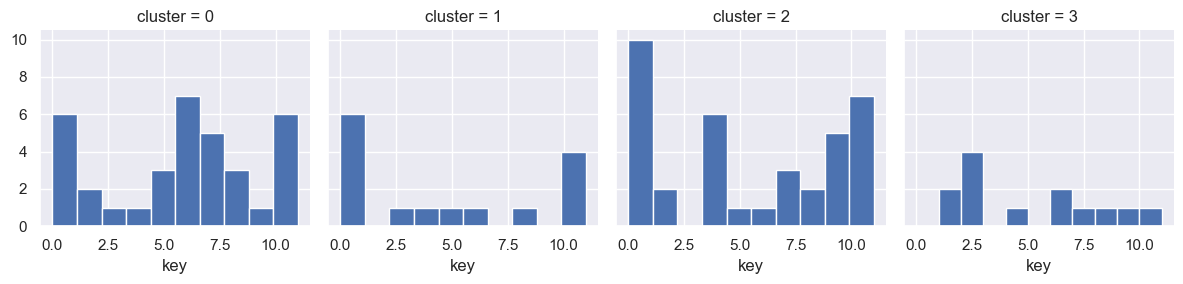

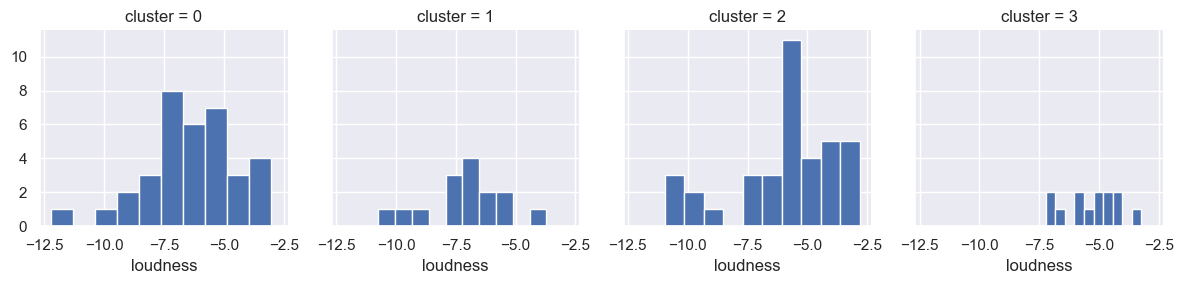

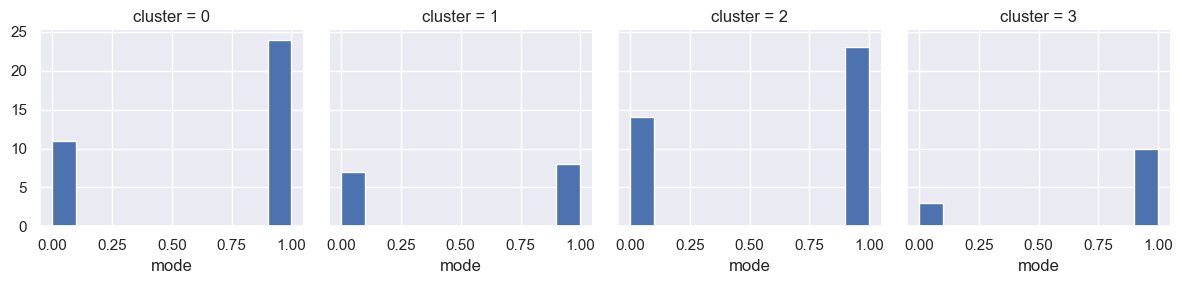

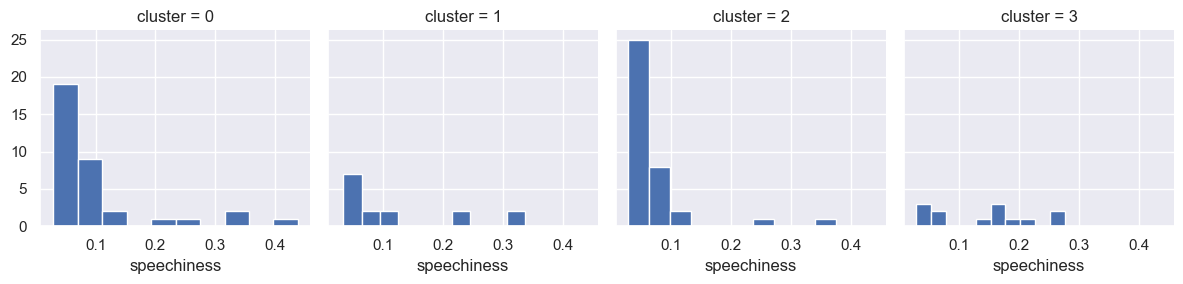

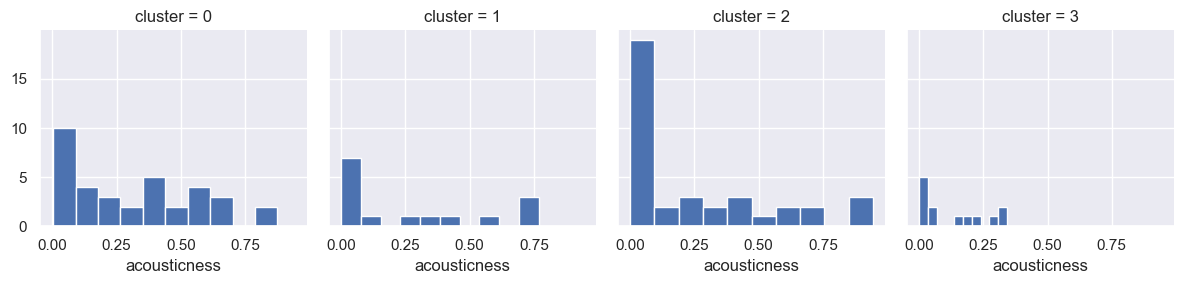

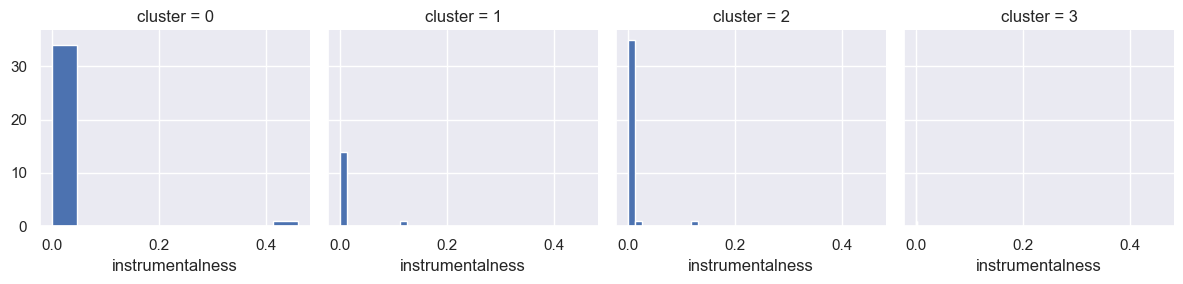

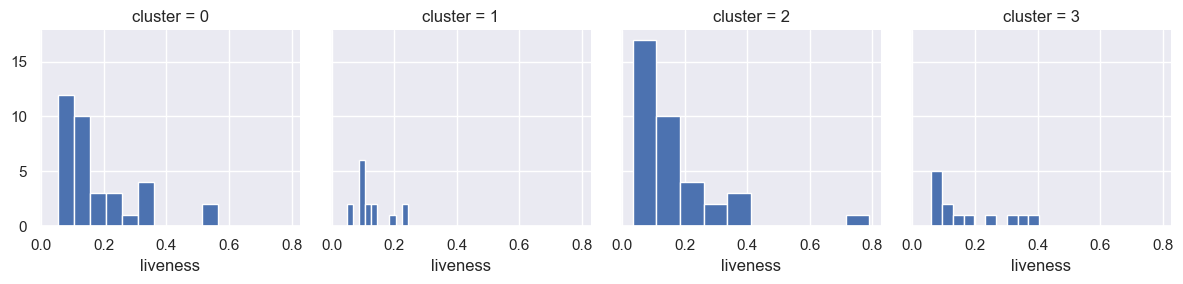

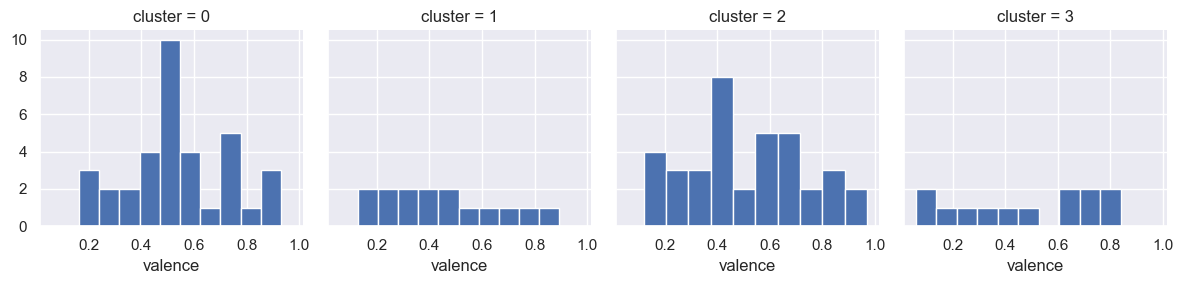

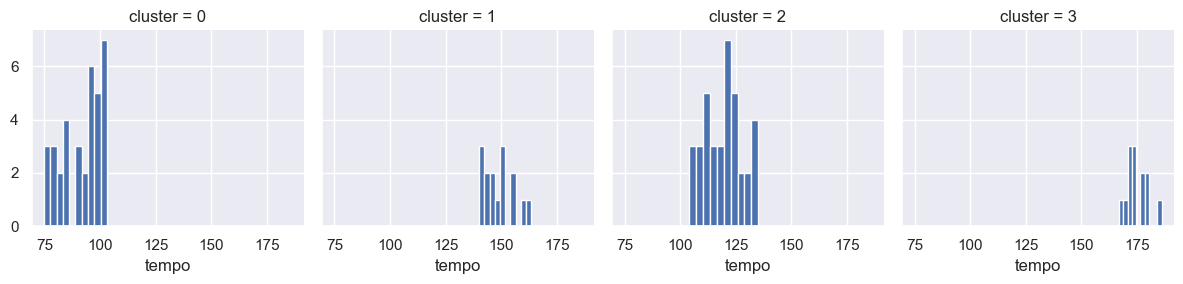

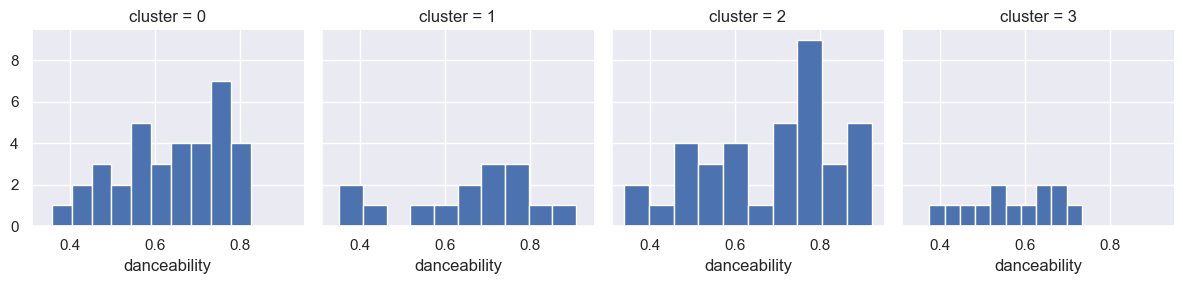

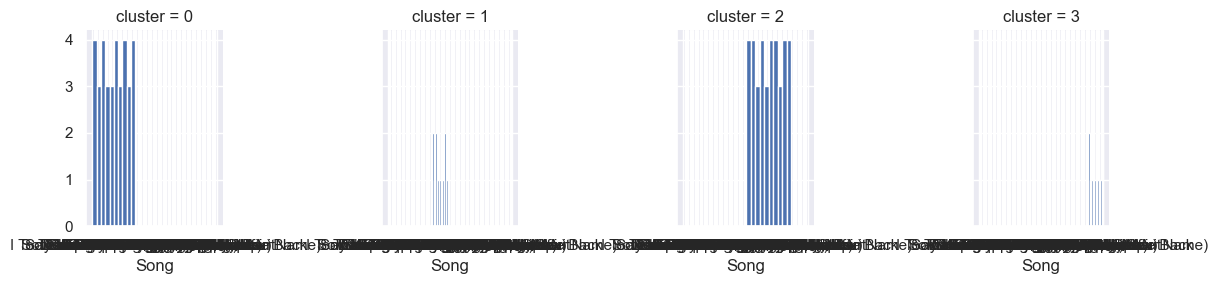

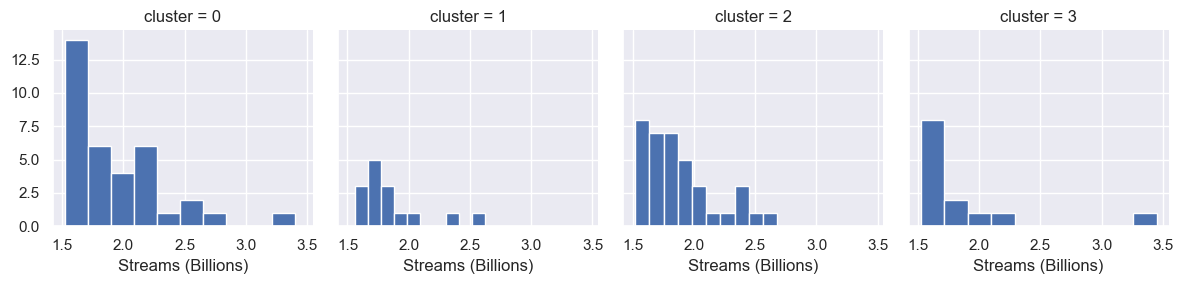

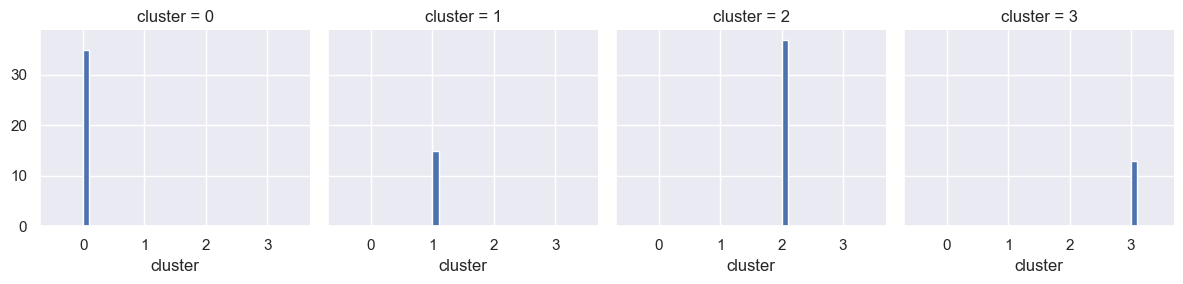

In [1282]:
# PRINT HIST OF ALL FEATURES PER CLUSTER

for c in birch_clusters:
    grid= sns.FacetGrid(birch_clusters, col='cluster')
    grid.map(plt.hist, c)    
    plt.show()

In [1283]:
# PREP DATA FOR SNAKE PLOT

# MELT ~ PIVOT 
    # -> index all features values

datamart_melt = pd.melt(birch_clusters.reset_index(),
id_vars=['cluster'],

# value_vars=['id', 'name', 'duration',
#             'energy', 'key', 
#             'loudness', 'mode', 'speechiness',
#             'acousticness', 'instrumentalness', 
#             'liveness', 'valence', 'tempo', 'danceability', 
#             'Song', 'Artist', 'Streams (Billions)', 'Release Date'],
value_vars=['energy', 'key', 
            'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 
            'liveness', 'valence', 'tempo', 'danceability', 
            'Song', 'Streams (Billions)'],

var_name='ATTRIBUTES',
value_name='VALUES')

# TO MAKE VALUES PRINTABLE IN PLOT
datamart_melt["VALUES"] = datamart_melt["VALUES"].astype(str)

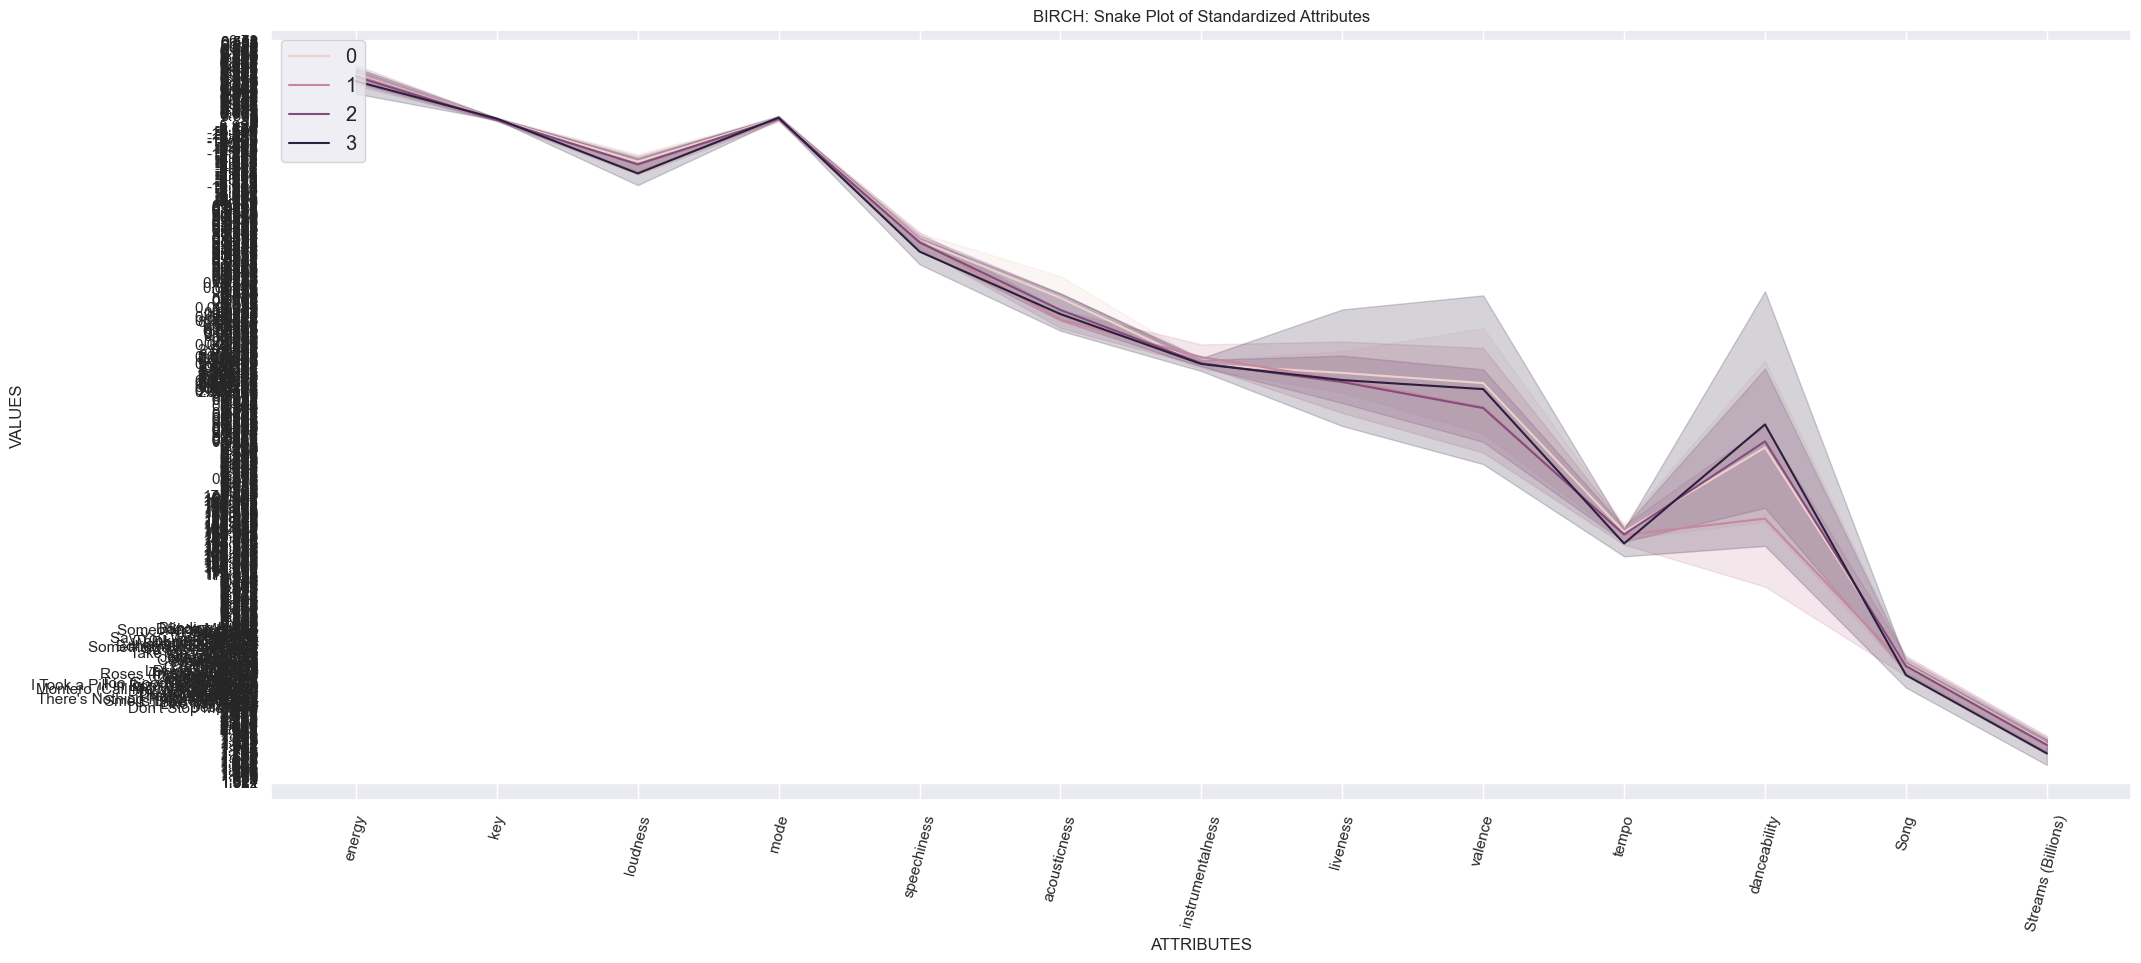

In [1284]:
# SNAKEPLOT
    # type de visualisation de données pour étudier le comportement
    # chaque ligne ( ici cluster ) représente un "sujet"

plt.figure(figsize=(24, 10))
chart = sns.lineplot(x="ATTRIBUTES", y="VALUES", hue='cluster', data=datamart_melt)
plt.title('BIRCH: Snake Plot of Standardized Attributes')
plt.xticks(rotation=75)
plt.legend(loc='upper left', fontsize='large')

figure.tight_layout()

In [1285]:
# CALCUL DE MOYENNES 

cluster_avg = birch_clusters.groupby(['cluster']).mean()
population_avg = birch_clusters.mean()
population_avg = population_avg.drop('cluster')
relative_imp = cluster_avg/population_avg
relative_imp.sort_values(by=['cluster'],inplace=True)
relative_imp.round(2).unstack()

relative_imp

,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability,Streams (Billions)
cluster,,,,,,,,,,,,
0,0.951787,1.080792,1.027308,1.054945,1.038428,1.216763,1.733955,1.070071,1.061970,0.753592,0.980030,1.023101
1,0.987583,0.898876,1.146823,0.820513,1.262235,1.015693,1.055844,0.748060,0.878164,1.227725,1.015655,0.979255
2,1.002873,1.007187,0.963691,0.956341,0.708266,0.965269,0.628622,1.024561,1.007150,0.985522,1.055070,0.993158
3,1.135953,0.878709,0.860409,1.183432,1.424283,0.497151,0.016531,1.032144,0.953387,1.441854,0.878962,0.981216


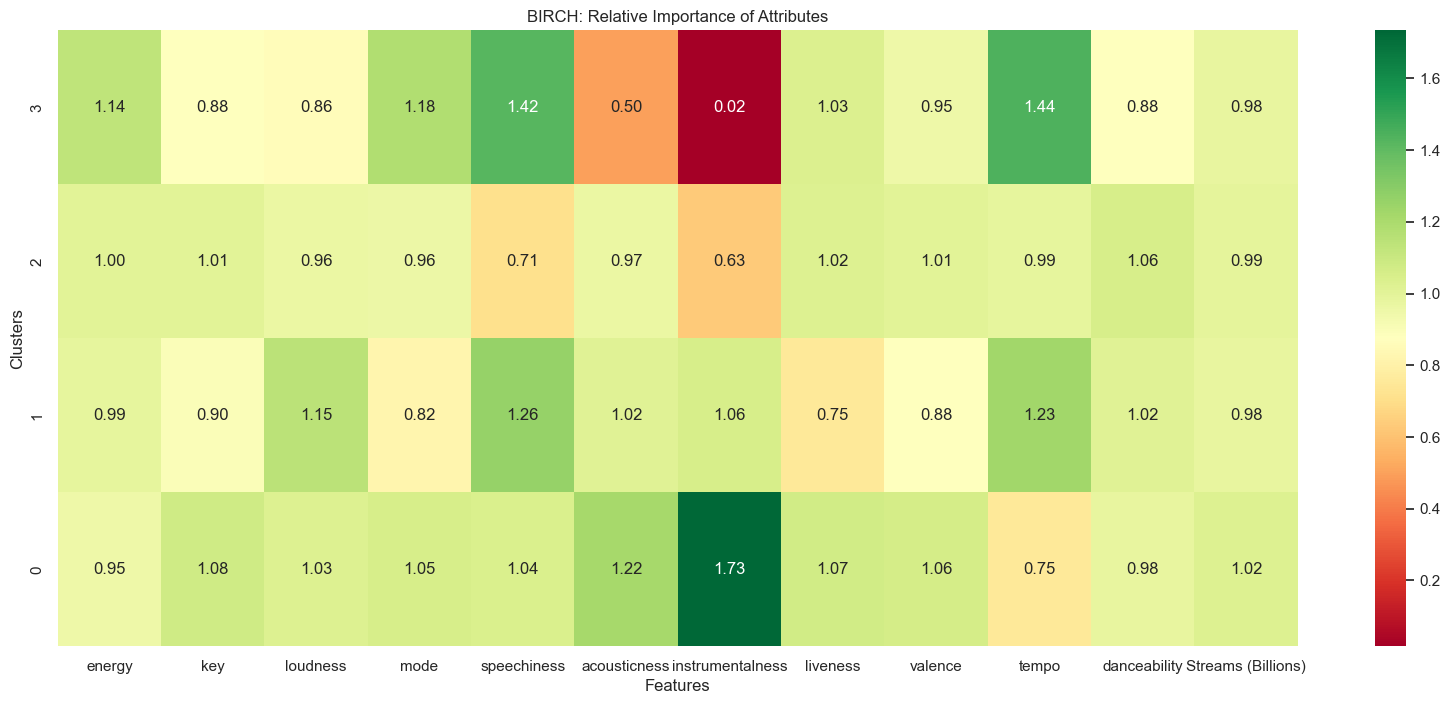

In [1286]:
# HEATMAP DES FEATURES IMPORTANTES PAR CLUSTER

plt.figure(figsize=(20, 8))
plt.title('BIRCH: Relative Importance of Attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn', yticklabels='auto')
plt.ylim(0,4)
plt.xlabel('Features')
plt.ylabel('Clusters')
figure.tight_layout()
plt.show()

# -> cluster 0 -> max 1.73  | instrumentalness
# -> cluster 1 -> max 1.26  | speechiness           || "speechiness" taux qui détermine si la musique est plutôt chantée ou parlée
# -> cluster 2 -> max 1.06  | danceability          
# -> cluster 3 -> max 1.44  | tempo

TEST | TRAVAUX HORS SUJET

In [1287]:
# X = df_final.drop("Streams (Billions)",axis=1)
# y = df_final["Streams (Billions)"]

# ros = RandomOverSampler()
# X_ros, y_ros = ros.fit_resample(X, y)

# # ValueError: Unknown label type: 'continuous'

# scaler = MinMaxScaler()
# y = scaler.fit_transform(y.values.reshape(-1, 1)).flatten()

# ######################

# X_train, X_test, y_train, y_test = train_test_split(
#     X,
#     y,
#     test_size=0.2,
#     random_state=42
# )

In [1288]:
# scaler = StandardScaler()
# scaled_X_train = scaler.fit_transform(X_train)
# scaled_X_test = scaler.transform(X_test)

# trees = 100
# max_features = 3
# results = []
# names_of_models = []

# model_list = [
#             ('LogisticRegression', LogisticRegression()),
#             ('KNeighborsClassifier', KNeighborsClassifier()),
#             ('DecisionTreeClassifier', DecisionTreeClassifier()),
#             ('RandomForestClassifier', RandomForestClassifier(n_estimators=trees,max_features=3))
# ]


# for name, model in model_list:
#     kfold = KFold(n_splits=10, random_state=None)
#     cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
#     results.append(cv_results)
#     names_of_models.append(name)
#     res = f"{name}: \n\t mean: {cv_results.mean()} \n\t std: ({cv_results.std()})"
#     print(res)

# ValueError: Unknown label type: 'continuous'

In [1289]:
# LinearRegression

# model = LinearRegression()

# model.fit(X_train, y_train)

# predictions = model.predict(X_test)
# mse = mean_squared_error(y_test, predictions)

# print(predictions)
# print("\nMean Squared Error:", mse)

In [1290]:
# Randomforest

# model = RandomForestRegressor(n_estimators=100, random_state=42)

# model.fit(X_train, y_train)

# predictions = model.predict(X_test)
# mse = mean_squared_error(y_test, predictions)

# print(predictions)
# print("\nMean Squared Error:", mse)

In [1291]:
# Decision tree

# model = DecisionTreeRegressor(random_state=42)

# model.fit(X_train, y_train)

# predictions = model.predict(X_test)
# mse = mean_squared_error(y_test, predictions)

# print(predictions)
# print("\nMean Squared Error:", mse)

In [1292]:
# KNN

# model = KNeighborsRegressor(n_neighbors=5)

# model.fit(X_train, y_train)

# predictions = model.predict(X_test)
# mse = mean_squared_error(y_test, predictions)

# print(predictions)
# print("\nMean Squared Error:", mse)

In [1293]:
# df = df_final.drop(columns=["Artist"])

# df = df_final
# corr = df.corr()
# fig, ax = plt.subplots(figsize=(10, 10))
# sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)
# plt.show()

In [1294]:
# from sklearn.preprocessing import scale
# from sklearn.preprocessing import MinMaxScaler
# min_max = MinMaxScaler()
# min_max
# min_max.fit(df)
# min_max.data_min_
# min_max.data_max_
# min_max.transform(df)
# pd.DataFrame(min_max.transform(df), columns=df.columns, index=df.index).boxplot(rot = 45)
# df_minmax = min_max.fit_transform(df)
# df_minmax

In [1295]:
# sns.displot(df_final, x='duration')
# plt.show()

In [1296]:
# sns.displot(df_final, x='mode')
# plt.show()

In [1297]:
# ENCODE

# data = pd.get_dummies(df_final, columns=['key', 'mode'])

# MINMAX

# scaler = MinMaxScaler()
# col = ['energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'danceability']
# data[col] = scaler.fit_transform(data[col])

# SEP TARGET

# X = data.drop("Streams (Billions)",axis=1)
# y = data["Streams (Billions)"]

#

# ros = RandomOverSampler()
# X_ros, y_ros = ros.fit_resample(X, y)

# X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.1, random_state=101)

# scaler = StandardScaler()
# scaled_X_train = scaler.fit_transform(X_train)
# scaled_X_test = scaler.transform(X_test)


In [1298]:
# trees = 100
# max_features = 3
# results = []
# names_of_models = []

# model_list = [
#             ('LogisticRegression', LogisticRegression()),
#             ('KNeighborsClassifier', KNeighborsClassifier()),
#             ('DecisionTreeClassifier', DecisionTreeClassifier()),
#             ('RandomForestClassifier', RandomForestClassifier(n_estimators=trees,max_features=3))
# ]


# for name, model in model_list:
#     kfold = KFold(n_splits=10, random_state=None)
#     cv_results = cross_val_score(model, scaled_X_train, y_train, cv=kfold, scoring='accuracy')
#     results.append(cv_results)
#     names_of_models.append(name)
#     res = "{}: \n\t mean: {} \n\t std: ({})".format(name, cv_results.mean(), cv_results.std())
#     print(res)

In [1299]:
# df_final['mode'].value_counts(normalize=True)


In [1300]:
# scatter_mat = scatter_matrix(df_final, figsize = (16,10))
# print(scatter_mat)